In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
X_train_smok = []
y_train_smok = []

for i in os.listdir('images/train/'):
    try:
        if i.startswith('sm'):
            image = cv2.imread(f'images/train/{i}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (250, 250))
            image = image.reshape(250, 250, 1)
            X_train_smok.append(image)
            y_train_smok.append(1)
    except:
        continue
X_train_smok = np.array(X_train_smok)
y_train_smok = np.array(y_train_smok)

In [3]:
X_train_smok.shape

(298, 250, 250, 1)

In [4]:
y_train_smok.shape

(298,)

In [5]:
X_train_fire = []
y_train_fire = []

for i in os.listdir('images/train/'):
    try:
        if i[0:1]!= 'sm':
            image = cv2.imread(f'images/train/{i}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (250, 250))
            image = image.reshape(250, 250, 1)
            X_train_fire.append(image)
            y_train_fire.append(0)
    except:
        continue
X_train_fire = np.array(X_train_fire)
y_train_fire = np.array(y_train_fire)

In [6]:
X_train_fire.shape

(1142, 250, 250, 1)

In [7]:
y_train_fire.shape

(1142,)

In [8]:
X_val_smok = []
y_val_smok = []

for i in os.listdir('474_fire_val/images/val/'):
    try:
        if not i.startswith('sm'):
            image = cv2.imread(f'474_fire_val/images/val/{i}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (250, 250))
            image = image.reshape(250, 250, 1)
            X_val_smok.append(image)
            y_val_smok.append(1)
    except Exception as e:
        continue

X_val_smok = np.array(X_val_smok)
y_val_smok = np.array(y_val_smok)


In [9]:
X_val_smok.shape

(271, 250, 250, 1)

In [10]:
y_val_smok.shape

(271,)

In [11]:
X_val_fire = []
y_val_fire = []

for i in os.listdir('474_fire_val/images/val/'):
    try:
        if i[0:1]!= 'sm':
            image = cv2.imread(f'474_fire_val/images/val/{i}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (250, 250))
            image = image.reshape(250, 250, 1)
            X_val_fire.append(image)
            y_val_fire.append(0)
    except:
        continue
X_val_fire = np.array(X_val_fire)
y_val_fire = np.array(y_val_fire)

In [12]:
X_val_fire.shape

(307, 250, 250, 1)

In [13]:
y_val_fire.shape

(307,)

In [14]:
y_val = np.concatenate((y_val_fire, y_val_smok))
y_train = np.concatenate((y_train_fire,y_train_smok))

In [15]:
X_val = np.concatenate((X_val_fire, X_val_smok))
X_train = np.concatenate((X_train_fire,X_train_smok))

In [16]:
from keras.utils import to_categorical

In [17]:
y_val = to_categorical(y_val,num_classes=2)
y_train = to_categorical(y_train,num_classes=2)

In [18]:
from keras import Sequential

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [43]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(250, 250, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(32, activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=10)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 592ms/step - accuracy: 0.6258 - loss: 16.6757 - val_accuracy: 0.5294 - val_loss: 0.6925
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 567ms/step - accuracy: 0.7958 - loss: 0.6428 - val_accuracy: 0.5294 - val_loss: 0.7787
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 569ms/step - accuracy: 0.7862 - loss: 0.5620 - val_accuracy: 0.5294 - val_loss: 0.9185
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 586ms/step - accuracy: 0.8010 - loss: 0.4791 - val_accuracy: 0.5311 - val_loss: 0.7995
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 577ms/step - accuracy: 0.7938 - loss: 0.4577 - val_accuracy: 0.5311 - val_loss: 1.0868
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 564ms/step - accuracy: 0.7965 - loss: 0.4239 - val_accuracy: 0.5311 - val_loss: 1.0934
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - accuracy: 0.7868 - loss: 0.4194 - val_accuracy: 0.5311 - val_loss: 1.2583
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 585ms/step - accuracy: 0.7960 - loss: 0.4465 - val_acc

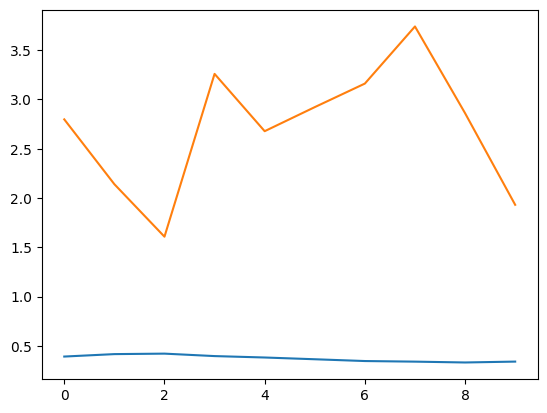

In [42]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])